In [9]:
# Import raw data from Excel
import pandas as pd
filepath = 'C:/Users/PXY/Desktop/history_MAYBANK_20181107.csv';
data = pd.read_csv ( filepath );
print (df)

      <ticker>   <name> <per>    <date>  <open>  <high>   <low>  <close>  \
0         1155  MAYBANK     D  19940103  4.5451  4.5451  4.3776   4.4016   
1         1155  MAYBANK     D  19940104  4.4494  4.7365  4.3776   4.4734   
2         1155  MAYBANK     D  19940105  4.4972  4.5929  4.4734   4.5929   
3         1155  MAYBANK     D  19940106  4.5690  4.5929  4.2341   4.2581   
4         1155  MAYBANK     D  19940107  4.1384  4.2819  3.8035   3.8753   
5         1155  MAYBANK     D  19940110  3.8275  4.0428  3.8275   3.9949   
6         1155  MAYBANK     D  19940111  3.8275  3.9949  3.7318   3.8275   
7         1155  MAYBANK     D  19940112  3.8275  3.8275  3.3490   3.5165   
8         1155  MAYBANK     D  19940113  3.6360  3.6600  3.4208   3.4447   
9         1155  MAYBANK     D  19940114  3.7318  3.9471  3.5882   3.8035   
10        1155  MAYBANK     D  19940117  3.8513  3.8513  3.7078   3.7557   
11        1155  MAYBANK     D  19940118  3.7078  3.7557  3.6840   3.6840   
12        11

In [126]:
# Add new column
import datetime 
date = []
for index,row in df.iterrows():
    row['Date'] = datetime.datetime.strptime( '{:08}'.format( int( row['<date>'] ) ), '%Y%m%d').date()
    date.append( row['Date'])
data['Date'] = date

In [21]:
# Split into train and test sets",
train_size = int(len(data) * 0.7)
test_size = len(data) - train_size
train, test = data[:train_size], data.tail(test_size)

# Get the subset of the data for training
training_set = train.iloc[:,7].values
# Define the timestep
timestep = 1

# Create input for training
import numpy as np
X_train = []
y_train =[]
for i in range(timestep, len(training_set)):
    X_train.append(training_set[i-timestep:i]);
    y_train.append(training_set[i])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))   

In [129]:
# Build and train the model
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

regressor = tf.keras.Sequential()

regressor.add(LSTM(units = timestep, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2) )

#regressor.add(LSTM(units = timestep, return_sequences = True))
#regressor.add(Dropout(0.2))

#regressor.add(LSTM(units = timestep, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = timestep))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
4253/4253 [==============================] - 7s 2ms/sample - loss: 41.8450
Epoch 2/100
4253/4253 [==============================] - 2s 402us/sample - loss: 39.1907 - los
Epoch 3/100
4253/4253 [==============================] - 1s 346us/sample - loss: 35.6264
Epoch 4/100
4253/4253 [==============================] - 1s 321us/sample - loss: 30.9230
Epoch 5/100
4253/4253 [==============================] - 2s 354us/sample - loss: 26.0346
Epoch 6/100
4253/4253 [==============================] - 1s 347us/sample - loss: 21.5376
Epoch 7/100
4253/4253 [==============================] - 2s 371us/sample - loss: 17.8506
Epoch 8/100
4253/4253 [==============================] - 2s 414us/sample - loss: 15.3113
Epoch 9/100
4253/4253 [==============================] - 2s 587us/sample - loss: 13.2295
Epoch 10/100
4253/4253 [==============================] - 2s 413us/sample - loss: 11.4733
Epoch 11/100
4253/4253 [==============================] - 2s 440us/sample - loss: 9.9736
Epoch 12/100
425

4253/4253 [==============================] - 2s 422us/sample - loss: 0.0526
Epoch 93/100
4253/4253 [==============================] - 2s 468us/sample - loss: 0.0514
Epoch 94/100
4253/4253 [==============================] - 2s 437us/sample - loss: 0.0511
Epoch 95/100
4253/4253 [==============================] - 2s 436us/sample - loss: 0.0498
Epoch 96/100
4253/4253 [==============================] - 2s 405us/sample - loss: 0.0497
Epoch 97/100
4253/4253 [==============================] - 2s 441us/sample - loss: 0.0481
Epoch 98/100
4253/4253 [==============================] - 2s 458us/sample - loss: 0.0472s - loss: 
Epoch 99/100
4253/4253 [==============================] - 2s 477us/sample - loss: 0.0465
Epoch 100/100
4253/4253 [==============================] - 2s 450us/sample - loss: 0.0459


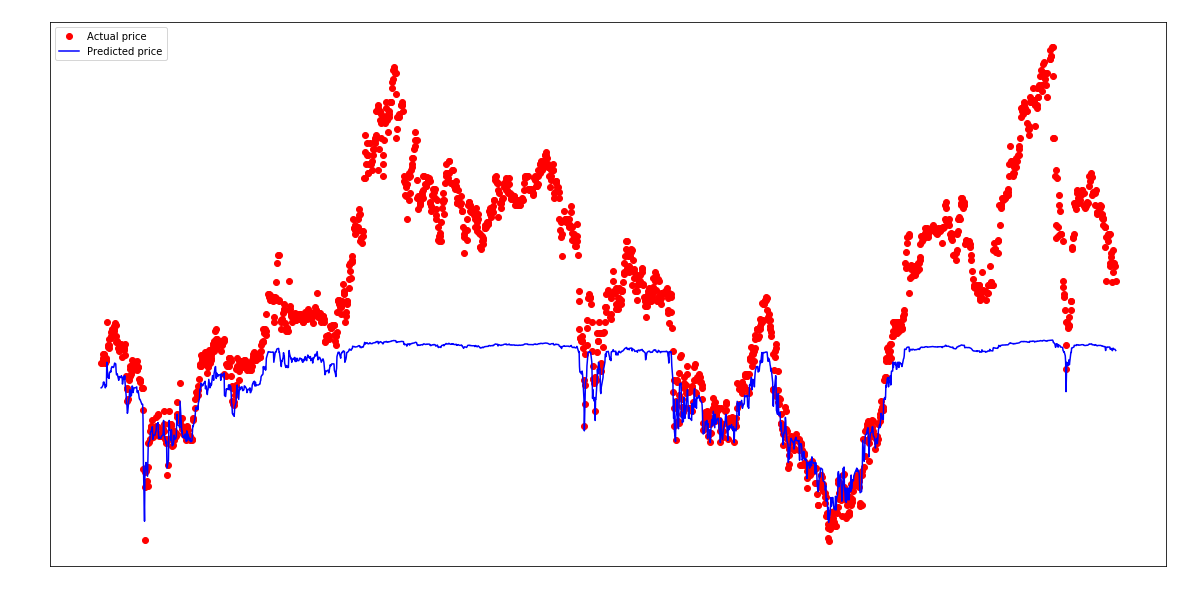

Test RMSE: 0.718
Test RMSE for first 20: 0.205


In [212]:
# Create test data for prediction
test_set = training_set[-timestep:]
test_set = np.concatenate(( (test.iloc[:,7].values),test_set ) )
X_test = []

# Make prediction
for i in range(timestep, len(test) + timestep ):
    X_test.append(test_set[i-timestep:i])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_price = regressor.predict(X_test)
predicted_price = predicted_price.reshape(-1)
plotchart(predicted_price)

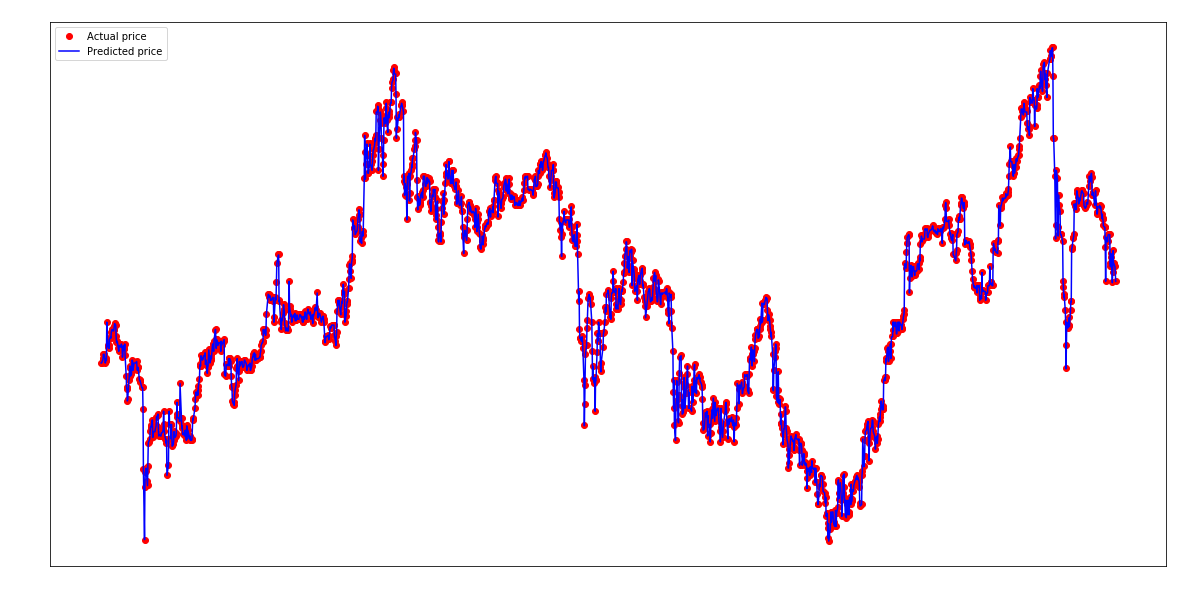

Test RMSE: 0.004
Test RMSE for first 20: 0.003


In [209]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
lr_train = X_train.reshape(-1,1)
model.fit(lr_train,y_train)
lr_test = X_test.reshape(-1,1)
predicted_price = model.predict(lr_test)
plotchart(predicted_price)

In [ ]:
mlpmodel = tf.keras.Sequential()
mlptrain = X_train.reshape(-1,1)
mlpmodel.add(Dense(units = 10, activation = 'relu', input_dim = X_train.shape[1] ) )
mlpmodel.add(Dense(units = 1 ) )
mlpmodel.compile(optimizer = 'adam', loss = 'mean_squared_error')
mlpmodel.fit(mlptrain, y_train, epochs = 100, batch_size = 32)

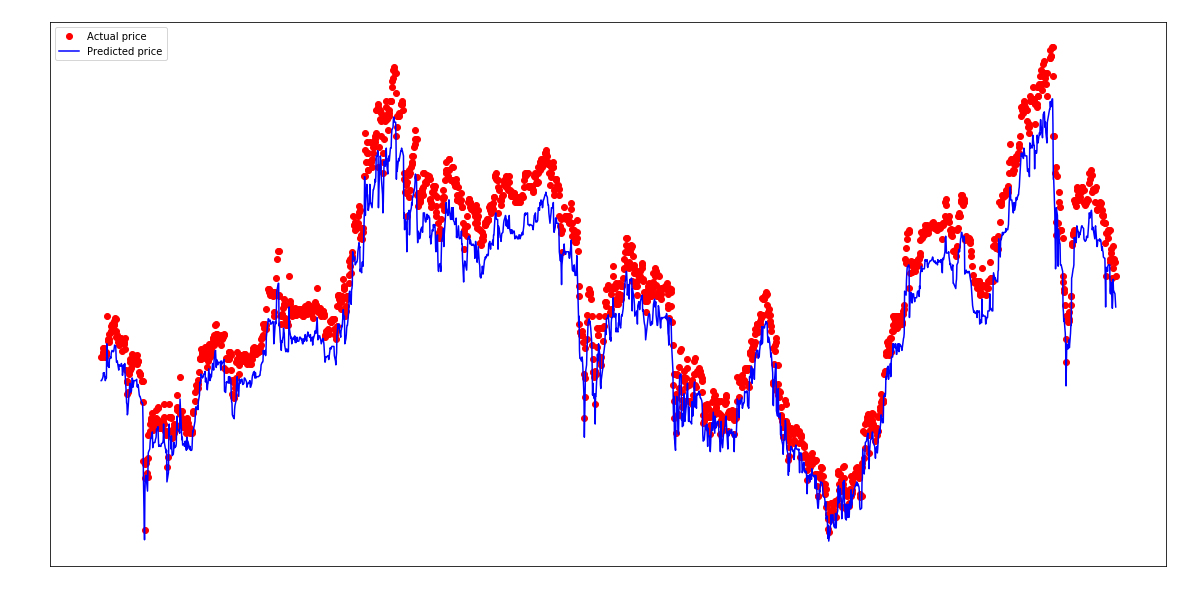

Test RMSE: 0.214
Test RMSE for first 20: 0.175


In [211]:
mlptest = X_test.reshape(-1,1)
predicted_price = mlpmodel.predict(mlptest)
plotchart(predicted_price)

In [207]:
def plotchart(predicted_price):
    # Get real data
    real_price = data['<close>'].tail(test_size).values

    # Visualising the results
    import matplotlib
    import matplotlib.pyplot as plt
    matplotlib.rc('figure', figsize=[20,10])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.plot( data['Date'].tail(test_size)[0:], real_price[0:], 'ro', color = 'red',  label = 'Actual price')
    ax.plot(data['Date'].tail(test_size)[0:], predicted_price[0:],  color = 'blue', label = 'Predicted price')
    title = plt.title('Stock price prediction')
    plt.setp(title, color='white')
    plt.xlabel('Time')
    plt.ylabel('price')
    ax.legend()
    ax.xaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='y', colors='white')
    plt.show()

    # Calculate RMSE
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    rmse = sqrt(mean_squared_error(real_price, predicted_price))
    print('Test RMSE: %.3f' % rmse)
    
    # Calculate RMSE for first 20
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    rmse = sqrt(mean_squared_error(real_price[:20], predicted_price[:20] ) ) 
    print('Test RMSE for first 20: %.3f' % rmse)
